# Analysis on Fast Food Chain Legal Claims

## Company Background


Vivendo is a fast food chain in Brazil with over 200 outlets. As with many fast food
establishments, customers make claims against the company. For example, they blame
Vivendo for suspected food poisoning.
The legal team, who processes these claims, is currently split across four locations. The new
head of the legal department wants to see if there are differences in the time it takes to close
claims across the locations.

## Customer Question
- How does the number of claims differ across locations?
- What is the distribution of time to close claims?
- How does the average time to close claims differ by location?

## Data Validation 
Describe the validation tasks you performed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data.

The following steps need to be accomplished in order for Data Discovery and Visualization to take place 
1. **Import necessary packges for analysis**
2. **Create table stating dataset validation requirements**
3. **Read the data into a Pandas DataFrame object**
4. **Inspect dataframe and identify necessary changes** 
5. **Implement necessary changes to the DataFrame**

### Import necessary packges for analysis

In [320]:
import pandas as pd
import matplotlib.pyplot as plt

#### Create table stating dataset validation requirements

In [321]:
d = {'Column Name': ['Claim ID', 'Time to Close', 'Claim Amount', 'Amount Paid','Location','Individuals on Claim','Linked Cases ','Cause'],

'Criteria': ['Character, the unique identifier of the claim', 'Numeric, number of days it took for the claim to be closed.','Numeric, initial claim value in the currency of Brazil.','Numeric, total amount paid after the claim closed in the currency of Brazil. l. For example,“R$50,000.00” should be converted into 50000.','Character, location of the claim, one of “RECIFE”, “SAO LUIS”, “FORTALEZA”, or “NATAL”.','Numeric, number of individuals on this claim.','Binary, whether this claim is believed to be linked with other cases, either TRUE or FALSE.','Character, the cause of the food poisoning injuries, one of "vegetable", "meat", or "unknown". Replace any empty rows with "unknown"']}

description = pd.DataFrame(data=d)

description

,Column Name,Criteria
0,Claim ID,"Character, the unique identifier of the claim"
1,Time to Close,"Numeric, number of days it took for the claim to be closed."
2,Claim Amount,"Numeric, initial claim value in the currency of Brazil."
3,Amount Paid,"Numeric, total amount paid after the claim closed in the currency of Brazil. l. For example,“R$50,000.00” should be converted into 50000."
4,Location,"Character, location of the claim, one of “RECIFE”, “SAO LUIS”, “FORTALEZA”, or “NATAL”."
5,Individuals on Claim,"Numeric, number of individuals on this claim."
6,Linked Cases,"Binary, whether this claim is believed to be linked with other cases, either TRUE or FALSE."
7,Cause,"Character, the cause of the food poisoning injuries, one of ""vegetable"", ""meat"", or ""unknown"". Replace any empty rows with ""unknown"""


**Read the data into a Pandas DataFrame**

In [322]:
df = pd.read_csv(r'claims.csv')
print(df)

                     Claim ID  Time to Close  Claim Amount  Amount Paid  \
0   0000000-00.2010.0.00.0094           2082   R$50,000.00     34297.47   
1   0000000-00.2011.0.00.0086           3591  R$180,000.00     56383.54   
2   0000000-00.2012.0.00.0092           2997   R$70,000.00     12366.76   
3   0000000-00.2013.0.00.0096           1143   R$95,104.00     29217.16   
4   0000000-00.2014.0.00.0097            117   R$29,000.00     12610.50   
..                        ...            ...           ...          ...   
93  0000000-00.2020.0.00.0023            208   R$80,396.00     40668.14   
94  0000000-00.2020.0.00.0057             86   R$50,000.00      8363.96   
95  0000000-00.2020.0.00.0010            201   R$60,000.00     42318.80   
96  0000000-00.2020.0.00.0059            200  R$474,542.00    329473.49   
97  0000000-00.2020.0.00.0073            195   R$40,000.00     15406.95   

     Location  Individuals on Claim  Linked Cases       Cause  
0      RECIFE                     2

**Inspect dataframe and identify necessary changes** 

In [323]:
df.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,"R$50,000.00",34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,"R$180,000.00",56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,"R$70,000.00",12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,"R$95,104.00",29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,"R$29,000.00",12610.50,FORTALEZA,1,False,meat


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim ID              98 non-null     object 
 1   Time to Close         98 non-null     int64  
 2   Claim Amount          98 non-null     object 
 3   Amount Paid           98 non-null     float64
 4   Location              98 non-null     object 
 5   Individuals on Claim  98 non-null     int64  
 6   Linked Cases          98 non-null     bool   
 7   Cause                 20 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 5.6+ KB


**Identified necessary changes**
1. Convert 'Claim Amount' colum into float data type.
2. Replace null values in 'Cause' column with 'unknown'

**Implement necessary changes to the DataFrame**

In [325]:
#Convert 'Claim Amount' colum into float data type
df['Claim Amount'] = df['Claim Amount'].str[2:].replace(',','', regex=True).astype(float)

#Replace 'null' in 'Cause' column with 'unknown'
df['Cause'] = df['Cause'].fillna('unknown')

#Inspect Validated Data
df.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,50000.0,34297.47,RECIFE,2,False,unknown
1,0000000-00.2011.0.00.0086,3591,180000.0,56383.54,SAO LUIS,7,False,unknown
2,0000000-00.2012.0.00.0092,2997,70000.0,12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,95104.0,29217.16,FORTALEZA,4,False,unknown
4,0000000-00.2014.0.00.0097,117,29000.0,12610.50,FORTALEZA,1,False,meat


## Data Discovery and Visualization
Describe what you found in the analysis and how the visualizations answer the customer questions in the project brief. In your description you should:
- Include at least two different data visualizations to demonstrate the characteristics of single variables
- Include at least one data visualization to demonstrate the relationship between two or more variables
- Describe how your analysis has answered the business questions in the project brief

## Strategy in answering Customer Questions
- **How does the number of claims differ across locations?** A pie chart will be useful in answering this question since there are only 4 locations. A pie chart will allow us to have a good visual representation of the number of claims per location when compared to the other locations. _This would also be considered as a data visualization that demonstrates the characteristics of single variables._
- **What is the distribution of time to close claims?**  A histogram will be useful in visualizing the distribution. It would allow us to see least and most number of days it takes to close claims. It would also reveal the most common number of days to close a claim. _This would also be considered as a data visualization that demonstrates the characteristics of single variables._
- **How does the average time to close claims differ by location?** A bar graph would be useful in determining the average time to close claims in the different locations. _This would also be considered as a data visualization that demonstrates the relationship of two variables._

## **How does the number of claims differ across locations?**

In [326]:
x = df.groupby(['Location'])['Location'].count()
print(x)

Location
FORTALEZA    22
NATAL        21
RECIFE       25
SAO LUIS     30
Name: Location, dtype: int64


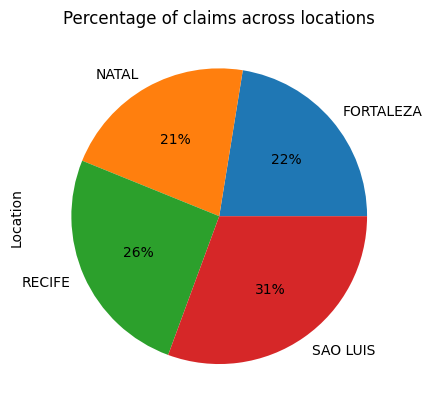

In [327]:
x.plot(kind='pie', autopct='%1.0f%%',title='Percentage of claims across locations');

## What is the distribution of time to close claims?

In [328]:
print('Mean: {}'.format(df['Time to Close'].mean()))
print('Median: {}'.format(df['Time to Close'].median()));

Mean: 832.3469387755102
Median: 638.5


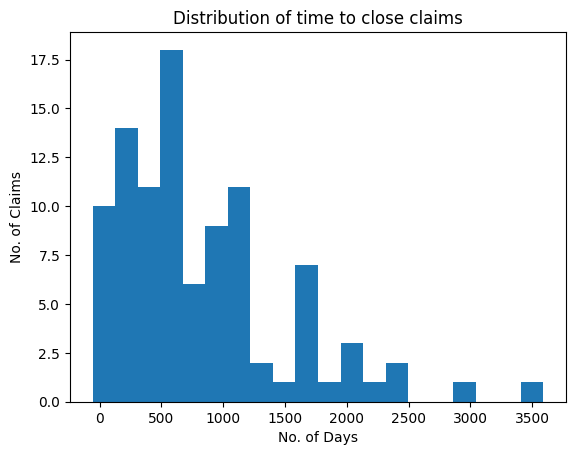

In [329]:
plt.hist(df['Time to Close'],bins=20)
plt.title("Distribution of time to close claims")
plt.xlabel('No. of Days')
plt.ylabel('No. of Claims');

## How does the average time to close claims differ by location?

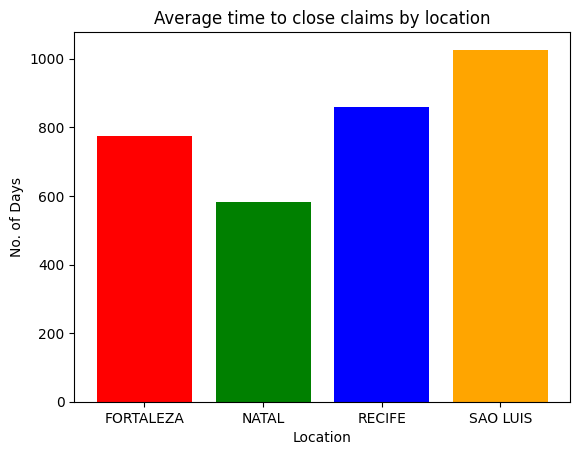

In [330]:
z = df.groupby(['Location'])['Time to Close'].mean().reset_index()

plt.title("Average time to close claims by location")
plt.xlabel('Location')
plt.ylabel('No. of Days')
plt.bar(z.Location,z['Time to Close'],color=['red', 'green', 'blue', 'orange']);


## **Description on how the analysis has answered the business questions in the project brief**

- **How does the number of claims differ across locations?** The pie chart revcealed that 21% of claims are from Natal. 22% are from Fortaleza, 31% are from Sao Luis, and 26% are from Recife. 

- **What is the distribution of time to close claims?** The histogram visualizies the distribution of time to close claims. The difference between median and mean signifies that there are outliers present. The histogram shows that outliers can be seen in 3000 and 3500 days.  
- **How does the average time to close claims differ by location?** The bar graph shows that Sao Luis has the longest average time to close claims while Natal has the shortest. A notable difference in average time to close claims is observed per location. 